# Linear Models for Regression

One of the oldest and most widely used models are linear regression models. Linear models for regression have been a staple in statistics and engineering long before the invention of the terms Computer Science and Machine Learning TODO cite. In fact, one of the most commonly used approaches goes back to Gauss himself, and you might have seen some variant of it in high school. Linear models for regression also serve as the basis for the linear models for classification that we will see in section TODO.

The principle of linear models is illustrated in Figure TODO which shows a linear regression in one dimension, in our terminology we have one feature, shown on the x-axis, and our target is shown on the y-axis.
We now try to find a linear relationship between the two, in other words, we want to find a straight line that is as close as possible to all of the points.
For a single feature, you can write the prediction given by the line as
$$ \hat{y} = a x + b $$
where $a$ and $b$ are fixed numbers, and $x$ is the value of our input feature. Here, $a$ is the slope of the line, and $b$ is known as the intercept or offset. It is the place where the fitted line crossed the y-axis.
For more than one feature, the prediction takes the form
$$ \hat{y} = w_1  x_1 + w_2  x_2 + ...  + w_p x_p + b $$
where $x_1$ to $x_p$ are the features (i.e. we have p features) and $w_1$ to $w_p$ are the coefficients or slope for each of these features.
For more than one features, visualizing the prediction is much trickier, so we'll skip that for now.

```{admonition} Mathematical details
Often the above equation is written as as an inner product between two vectors $w \in \mathbb{R}^p$ and $x\in \mathbb{R}^p$:
$$\hat{y} = w^T \mathbf{x} + b = \sum_{i=1}^p w_i x_i +b$$
As a side note, linear models are named such because they are linear in $w$, not because they are linear in $x$. In fact, we can replace any $x_i$ by an arbitrary fixed function of $x$, say $sin(x_i)$ or $x_i * x_j$, and it would still be considered a linear model. This is one of the powers of this kind of model, and we'll discuss it in more depth in chapter TODO feature engineering. 
```

All linear models for regression share the same formular for prediction shown in TODO. However, how they differ is in how they learn the coefficients $w$ and $b$ from the training data. Here, $w$ and $b$ are *parameters* of the model (in the statistical sense), i.e. they are the parts of the model that are estimated from the training data. Nearly all of the methods for learning linear models are formulated as an optimization problem, where the goal is to find the optimum of some mathematical formula, which is known as objective function. We will provide the objective functions (and therefore the optimizatio problem) that give rise to all the models we will discuss. If you are not familiar with optimization, you can skip these parts as we will also provide some more intuitive explanation of each method.

## Ordinary Least Squares
The oldest and probably the most widely use method to learn the parameters $w$ and $b$ is ordinary least squares (OLS). This is what people usually refer to when they say "linear regression" and it's what's implemented in scikit-learn's ``LinearRegression`` class. The idea behind OLS is to compute the *least squares* solution, which means find the parameters $w$ and $b$ so that the prediction error on the training set has the smallest possible squared norm.
This is a classical and well-understood method. However, it requires the training data to be somewhat well-behaved. If there are more features than there are samples, or if there is a linear relationship between the features, then the method can be unstable and will often reduce non-sensical results.
TODO image

```{admonition} Mathematical details
The objective function of ordinary least squares for linear regression is given by
$$\min_{w \in \mathbb{R}^p, b\in\mathbb{R}} \sum_{i=1}^n (w^T\mathbf{x}_i + b - y_i)^2$$
Here, $x_i, i=1,...,n $ are the training vectors and $y_i i=1,...,n$ TODO indexing unlike above?! are the corresponding targets.
The formula on the right computes the prediction error for each training sample, squares it, and then sums over all the samples.
The outcome is a number that measures the euclidean length (aka squared norm) of the error $\hat{y}_i - y_i$. We want to find a vector $w$ and a number $b$ such that this error is minimized.
If the data matrix X has full column rank, then this is a convex optimization problem, and we can easily compute the optimum with a number of standard techniques.
If the data matrix X does not have full column rank, for example if there is more feature than samples, then there is no unique optimum; in fact there will be infinitely many solutions that lead to zero error on the training set.
In this case, the optimization problem is called *ill conditioned* as no unique solution exists. In this case we can add additional criteria that guarantee a well-behaved solution TODO ref, though
they are not always implemented in statistical software.
```

Before we look at examples of using ``LinearRegression`` let's look at an alternative that is particularly popular for predictive modelling, *Ridge Regression*

## Ridge Regression
Ridge regression is an extension to OLS in which we add another demand to our solution. Not only do we want our model to fit the training data well, we also want it to be simple.
We already discussed in chapter TODO, that we prefer simple solutions, as they will generalize more readily to new data. TODO this needs work.
We can include this directly in our modeling process-however, we have to formalize what we mean by "simple". In Ridge regression, simple is encoded as having small slope in all directions.
In other words, we want our coefficient vectors $w$ to be as close as possible to 0 (in fact the restriction is on $w^2$). So now we have to goals: we want a simple model (i.e. one with small coefficients) that also fits the training data well. To allow optimizing both, we need to introduce a parameter, often called $\alpha$ (or sometimes $\lambda$) that trades off between the two goals. Now $\alpha$ is a hyper-parameter that we need to tune or pick, say using `GridSearchCV`. Setting $alpha=0$ will disregard the simplicity demand, and is equivalent to using OLS. Setting $\alpha=\infty$ will basically disregard the data fitting demand, and will produce a coefficient vector of all zeros, which is the most "simple" solution according to the least squares measure used in Ridge regression. The $\alpha$ parameter is known as *regularization parameter* or *penalty term*, as it regularizes or penalizes overly complex solutions $w$.

```{admonition} Mathematical details
The objective function of Ridge regression is very similar to OLS; it only has the addition of the penalty term $\alpha ||w||^2$. Notice that the intercept $b$ is not penalized. TODO explain?
$$ \min_{w \in \mathbb{R}^p, b\in\mathbb{R}} \sum_{i=1}^n (w^T\mathbf{x}_i + b - y_i)^2 + \alpha ||w||^2 $$
The first term in the objective function is also known as the data fitting term, while the second term, the penalty term, is completely independent of the data.
For $\alpha>0$, this objective function is always strongly convex, which leads to simple and robust optimization methods.
```

The benefit of Ridge regression is that it is much more stable than linear regression with OLS. If $\alpha>0$, it always has a unique solution, no matter how badly behaved your data is.
From a statistical perspective Ridge regression has the disadvantage that it is not an unbiased estimator: we explicitly biased our model to make the coefficients small, so predictions are biased towards zero. In predictive modeling, this is rarely an issue, however, you should keep it in mind.

The presence of a hyper-parameter could be seen either as an advantage or a disadvantage: one the one hand, it allows us to control the model fitting more closely, on the other it requires us to use some method to adjust the hyper-parameter, which makes the whole modeling process more complicated.


```{admonition} Mathematical details

## (regularized) Empirical Risk Minimization
The objective function shown in TODO is a typical example of a mathematical framework that's widely used in machine learning,
known as regularized empirical risk minimization.
As mentioned in TODO we didn't mention it yet, the goal in supervised learning is usually to find a function $f$ from a fixed familiy of fuctions $F$ that minimizes

$$\min_{f\in F} \mathbb{E}_{(x, y) \propto p} \ell(f(x), y)$$
for some loss function $\ell$. In other words, we want to minimize the expected loss between the prediction made by $f$ and the true outcome $y$,
when sampling $x$ and $y$ from the data distribution. However, in practice, it's usually impossible to access the data distribution $p$, and instead,
we have an i.i.d. sample from it, the training data.

The idea behind empirical risk minimization is that if we minimize the training set error, and the function $f$ is simple, then the error on new samples will also be small.
In other words, we replace the expectation in formula TODO by the empirical estimate on the training set:
$$\min_{f\in F} \sum_{i=i}^n\ell(f(x_i), y_i)$$
This is now a problem we can solve, and it is exactly the form of the objective found in OLS in equation TODO, where $F$ is the family of all linear models, as parametrized by $w$ and $b$, and $\ell$ is the squared loss.
If we take this approach, it's possible to proof theorems of the form TODO

In other words, we are trying to ensure a small error on the training set, and if we achive that, we can show that the test set error will also be small, if $f$ is sufficiently simple.
We could now try to optimize the bound in Equation TODO more directly, by optimizing both the training set error and encouraging the model to be simple.
This leads to *regularized empirical risk minimization* in which we add an additional *regularization term* $R$:
$$ \min_{f \in F} \sum_{i=1}^n L(f(\mathbf{x}_i), y_i) + \alpha R(f) $$
This is the approach taken by ridge regression, where $R$ is the squared norm of the coefficients.
Maybe somewhat surprisingly, equation TODO summarizes most of supervised machine learning, and nearly every supervised algorithm in this book follows this idea.
Linear models, support vector machines, neural networks and gradient boosting can all be formulated in this way, using different choices of the family of functions F, the loss $\ell$ and the regularizer $R$.
It is also the basis of nearly all theoretical analysis of machine learning algorithms. Interestingly, it is now thought to not adequately explain the generalization ability of the very large neural networks used today, as they are not "simple" in any way we can quantify easily. This has led to a large body of interesting work investigating new theoretical underpinning for deep neural networks TODO reference.
Please keep in mind that this is a very birds-eye view, as we are much more concerned with practical issues in this book.
Theoretical machine learning is a fascinating topic, and you can learn much, much more in the amazing book TODO.
```




### Coefficient of determination
To evaluate model fit for regression, scikit-learn by default uses the coefficient of determination, also known as $R^2$, which is defined as follows:
$$ R^2(y, \hat{y}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \hat{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2} $$
where $\bar{y}$ is the mean response over the training set:
$$ \bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i$$
The intuition of the measure it that it looks at the relative average distance between prediction and ground truth.

There are several definitions of this metric, but the one given in Equation TODO works for any model, and is what ``score`` will return for any regressor.
The benefit of this metric is that its scale is easily interpretable: a score of 1 means perfect prediction, while a score of 0 means constant or entirely random predictions.
Note that with this definition, the $R^2$ score can be negative, which basically means that predictions are worse than just predicting the mean.
A disadvantage of this score is that it depends on the variance of the data it is applied to, which has several peculiar implications.
In particular, adding a data point with an extreme true response value will improve the overall score. Also, the mean is estimated independently when scoring the test set,
which can lead to artifacts if the test set is small. In particular, when computing the score on a single data point, it is undefined.
TODO reference Max Kuhn.

An alternative metric that has very different properties, is the root mean squared error (RMSE), which we'll discuss in more detail in Chapter TODO.

## Linear regression on the diabetes dataset
We start out with a relatively small dataset that comes with scikit-learn, the diabetes dataset.
It has 442 rows corresponding to patients with diabetes, and 10 features describing different aspects of their health. The goal is to predict a quantiative measure of desease progression after one year.

In [111]:
# start by loading the dataset and doing a quick first look
from sklearn.datasets import load_diabetes
X, y = load_diabetes(as_frame=True, return_X_y=True)
print(X.shape)
X.head()

(442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


Before we're staring to build our regression models, it's a good idea to do some basic visualization to familiarize yourself with the dataset and spot any particularly salient aspects or data quality issues.

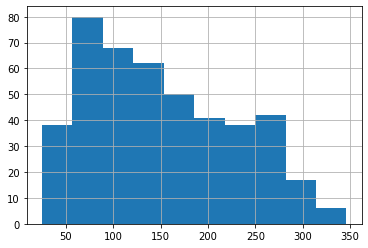

In [112]:
# It's a good idea to get an idea of the distribution of the target variable.
# Here we're using matplotlib's histogram function.
# Remember to set bins to auto, otherwise it's using 10 bins
# the histogram is somewhat skewed to the left, though not extremely
# and has a maximum around somewhere around 90
import matplotlib.pyplot as plt
y.hist(bins='auto')

At this point we split off a test set, which we will set aside for now. It can be used later to evaluate a final model of our choice.

In [113]:
# Split the data into training and test set before doing more in-depth visualization
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Given that the dataset has only ten features, it's not too much to look at all of them. Here we're doing a scatterplot of the feature on the x-axis against the target we want to predict on y-axis.
This will show us any direct dependency of the target on each feature, but will not show more complex interactions.

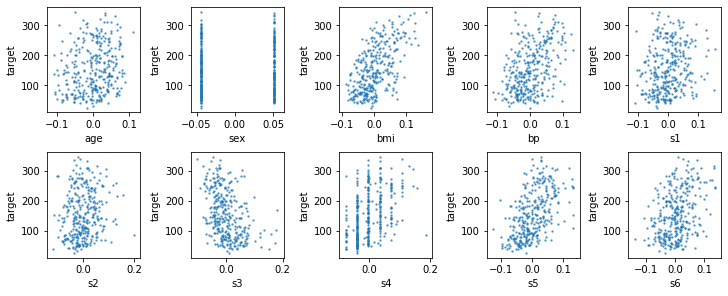

In [114]:
# Create dataframe containing target for plotting
df_train = X_train.copy()
df_train['target'] = y_train

fig, axes = plt.subplots(2, 5, constrained_layout=True, figsize=(10, 4))
for col, ax in zip(X.columns, axes.ravel()):
    df_train.plot(x=col, y='target', kind='scatter', ax=ax, legend=False, s=2, alpha=.6)

The first thing you might notice in these plots is that the data was already scaled, as the age is between -0.1 and 0.1. Therefore we will use the data as-is.
You can also see that the sex column is a categorical feature, as might be expected. while all of the other features are continuous. Feature s4 is concentrated on some particular values, though.
Looking at the relationship with the target, there is a clear dependency of the target on the BMI, and several of the other features also seem informative.
It can also be a good idea to look at the correlation between features, which are best shown using a seaborn clustermap. The clustermap rearranges the features to make correlations more apparent.

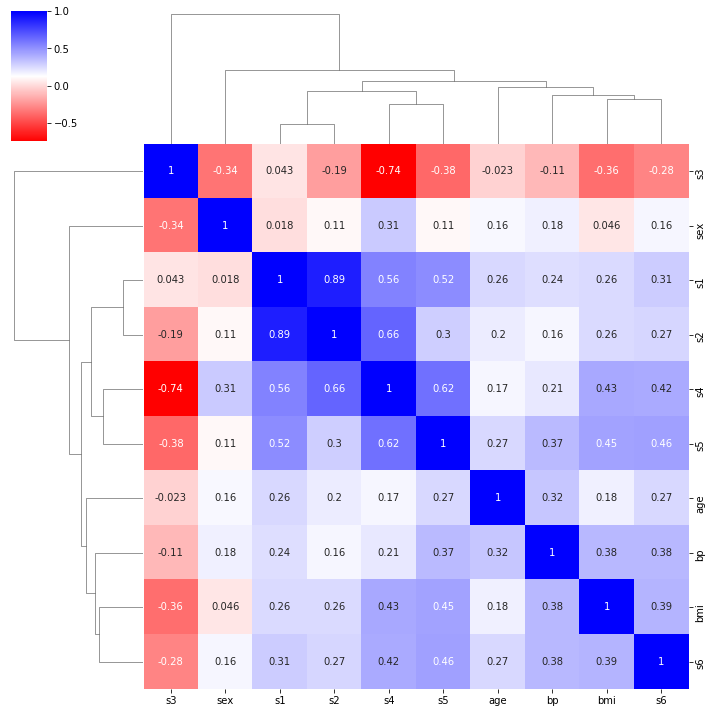

In [115]:
import seaborn as sns
# plot correlation, annmotate with values
sns.clustermap(X_train.corr(), annot=True, cmap='bwr_r')

We can see that there's a strong correlation between s1 and s2, and a relatively strong negative correlation between s3 and s4. We will keep all of the features for now.

Now we will use cross-validation to evaluate linear regression:

In [116]:
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import cross_validate

# run cross-validation, convert the results to a pandas dataframe for analysis
# return_train_score=True means that the training score is also computed
res = pd.DataFrame(cross_validate(LinearRegression(), X_train, y_train, return_train_score=True))
res

,fit_time,score_time,test_score,train_score
0,0.002023,0.001105,0.528990,0.506324
1,0.001728,0.001106,0.390191,0.539171
2,0.001560,0.001085,0.491299,0.521227
3,0.001472,0.001290,0.611033,0.480505
4,0.001720,0.001226,0.225245,0.561162


In [117]:
res.mean()

fit_time       0.001700
score_time     0.001162
test_score     0.449352
train_score    0.521678
dtype: float64

We can see that the model achives an $R^2$ of around 0.52 on the training set, while the test set score has quite a bit of variablilty over the five cross-validation folds, with a mean score of 0.44.
Given the small size of the dataset, such a variability is not very surprising, though.

Next, we can evaluate the ``Ridge`` model, with its default regularization parameter of alpha=1:

In [118]:
res = pd.DataFrame(cross_validate(Ridge(), X_train, y_train, return_train_score=True))
res

,fit_time,score_time,test_score,train_score
0,0.002253,0.001197,0.383890,0.397288
1,0.001504,0.001310,0.323097,0.428432
2,0.001865,0.001067,0.448959,0.402556
3,0.001474,0.001267,0.420870,0.373094
4,0.001430,0.001118,0.251547,0.437884


In [119]:
res.mean()

fit_time       0.001705
score_time     0.001192
test_score     0.365672
train_score    0.407851
dtype: float64

Both training and test score are lower using Ridge, though there is less variability in the test set score. The lower scores indicate that the model was overly restricted by the penalty term. There is no reason the default parameters would be optimal, an so we should always tune the regularization parameter in Ridge using ``GridSearchCV``. Regularization parameters such as alpha in Ridge are usually searched on a logarithmic scale. Given that using alpha=1 seems already too much weight on the regularization, we pick a grid of ``[0.0001, 0.001, 0.01, 0.1, 1, 10]``:

In [120]:
import numpy as np
from sklearn.model_selection import GridSearchCV
# logspace creates numbers that are evenly spaces in log-space
# it uses a base of 10 by default, here starting from 10^-4 to 10^1, with 6 steps in total
param_grid = {'alpha': np.logspace(-4, 1, 6)}
param_grid

{'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])}

In [121]:
# define and execute grid-search
# return training scores
grid = GridSearchCV(Ridge(), param_grid, return_train_score=True)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.4516801116608531
{'alpha': 0.1}


The best cross-validation score of 0.45 is achieved with ``alpha=0.1``. However, it's not substantially better than the score achieved by linear regression.
We should confirm that the parameter range we chose is appropriate by looking at the training and validation scores for the different parameters, stored in ``grid.cv_results_``:

In [68]:
res = pd.DataFrame(grid.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002091,0.000228,0.001326,0.000162,0.0001,{'alpha': 0.0001},0.528816,0.390597,0.491218,0.610916,...,0.449455,0.132386,4,0.506324,0.539168,0.521226,0.480504,0.561159,0.521676,0.027553
1,0.001447,0.000118,0.001109,0.000086,0.001,{'alpha': 0.001},0.527445,0.393458,0.490536,0.609957,...,0.450115,0.130527,3,0.506268,0.538987,0.521141,0.480426,0.560971,0.521559,0.027506
2,0.001661,0.000212,0.001114,0.000092,0.01,{'alpha': 0.01},0.521839,0.400945,0.487998,0.604883,...,0.451007,0.124386,2,0.505220,0.535916,0.519616,0.478931,0.557753,0.519487,0.026768
3,0.001451,0.000179,0.001098,0.000105,0.1,{'alpha': 0.1},0.513270,0.401617,0.498042,0.584170,...,0.451680,0.111577,1,0.498822,0.527579,0.512636,0.471906,0.548880,0.511965,0.026017
4,0.001344,0.000097,0.001039,0.000086,1,{'alpha': 1.0},0.383890,0.323097,0.448959,0.420870,...,0.365672,0.070926,5,0.397288,0.428432,0.402556,0.373094,0.437884,0.407851,0.023123
5,0.001522,0.000010,0.001155,0.000006,10,{'alpha': 10.0},0.079865,0.107844,0.149916,0.118348,...,0.094234,0.045432,6,0.126741,0.138133,0.120183,0.118031,0.137972,0.128212,0.008532


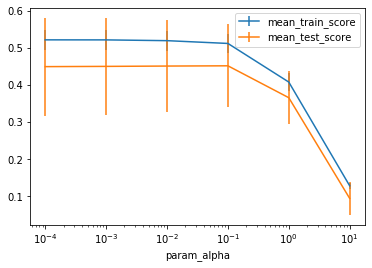

In [69]:
# plot training score vs parameter alpha, with x on logscale
# use std over cross-validation folds for error bars
ax = res.plot(x='param_alpha', y='mean_train_score', yerr='std_train_score', logx=True)
# same for test set, plot in the same axes
res.plot(x='param_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)

From the plot we can see that as we expected, traihning and test set score are low for alpha=1 and even lower for higher alpha. There seems little difference between the three lowest values of alpha; using alpha=10**-4 is low enough to be roughly equivalent to linear regression. We can see that using alpha=10*-1=0.1 performs slightly worse on the training set, but has slightly lower standard deviation on the test set. However, this is not much of an advantage over just using LinearRegression.

This is not entirely surprising as the data has many more samples than features, and there are only moderate correlations in the dataset. We can likely eliminate any advantage Ridge might have by dropping the highly correlated features ``s2`` and ``s4``:

In [79]:
# create a new data matrix without s2 and s4
X_train_sub = X_train.drop(columns=['s2', 's4'])
X_train_sub.head()

,age,sex,bmi,bp,s1,s3,s5,s6
16,-0.005515,-0.044642,0.042296,0.049415,0.024574,0.074412,0.052280,0.027917
408,0.063504,-0.044642,-0.050396,0.107944,0.031454,-0.017629,0.058039,0.040343
432,0.009016,-0.044642,0.055229,-0.005671,0.057597,-0.002903,0.055684,0.106617
316,0.016281,0.050680,0.014272,0.001215,0.001183,-0.032356,0.074968,0.040343
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,-0.036038,0.022692,-0.009362


In [83]:
# run cross-validation on the reduced dataset
res = pd.DataFrame(cross_validate(LinearRegression(), X_train_sub, y_train, return_train_score=True))
res

,fit_time,score_time,test_score,train_score
0,0.002007,0.001261,0.514748,0.504328
1,0.001455,0.001040,0.424273,0.528065
2,0.001617,0.001548,0.482717,0.516778
3,0.001481,0.001160,0.600992,0.477712
4,0.001539,0.001131,0.234819,0.553382


In [84]:
res.mean()

fit_time       0.001620
score_time     0.001228
test_score     0.451510
train_score    0.516053
dtype: float64

The results on the reduced dataset are basically identical to the results from ridge, and have lower variance than the results of Linear Regression on the original dataset.
TODO inspect coefficients.

## Linear regression on the Triazine Dataset
Next we will look at a dataset with quite different characteristics, the triazine dataset, which was collected in a drug discovery application.

In [122]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('triazines', return_X_y=True, as_frame=True)
X.head()

/home/andy/checkout/scikit-learn/sklearn/datasets/_openml.py:373: UserWarning: Multiple active versions of the dataset matching the name triazines exist. Versions may be fundamentally different, returning version 1.
  warn("Multiple active versions of the dataset matching the name"


,p1_polar,p1_size,p1_flex,p1_h_doner,p1_h_acceptor,p1_pi_doner,p1_pi_acceptor,p1_polarisable,p1_sigma,p1_branch,...,p6_polar,p6_size,p6_flex,p6_h_doner,p6_h_acceptor,p6_pi_doner,p6_pi_acceptor,p6_polarisable,p6_sigma,p6_branch
0,0.58,0.233,0.100,0.1,0.100,0.5,0.1,0.5,0.900,0.1,...,0.9,0.5,0.1,0.1,0.1,0.1,0.9,0.9,0.633,0.633
1,0.10,0.100,0.100,0.1,0.100,0.1,0.1,0.1,0.100,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.100,0.100
2,0.26,0.100,0.100,0.1,0.100,0.1,0.1,0.1,0.100,0.1,...,0.3,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.100,0.100
3,0.42,0.500,0.633,0.1,0.633,0.5,0.1,0.5,0.367,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.100,0.100
4,0.58,0.233,0.100,0.1,0.100,0.5,0.1,0.5,0.900,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.100,0.100


In [123]:
X.shape

(186, 60)

This dataset has 186 rows and 60 features, which is likely to pose a problem to unpenalized linear regression.

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

We can try to plot all features, however, looking at 60 plots becomes quickly overwhelming.

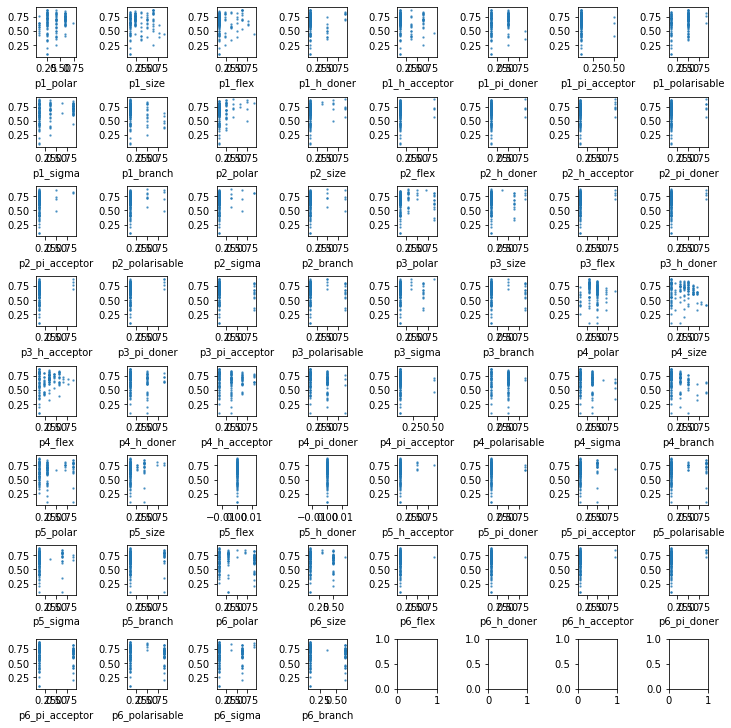

In [125]:
# Create dataframe containing target for plotting
df_train = X_train.copy()
df_train['target'] = y_train

fig, axes = plt.subplots(8, 8, figsize=(10, 10), constrained_layout=True)
for col, ax in zip(X.columns, axes.ravel()):
    df_train.plot(x=col, y='target', kind='scatter', ax=ax, legend=False, s=2, alpha=.6)
    ax.set_ylabel('')

However, we can see that ``p5_flex`` and ``p5_h_doner`` are constant, and therefore can be dropped:

In [126]:
X_train[['p5_flex', 'p5_h_doner']].std()

p5_flex       0.0
p5_h_doner    0.0
dtype: float64

In [127]:
X_train = X_train.drop(columns=['p5_flex', 'p5_h_doner'])

In [128]:
X_train.corr().shape

(58, 58)

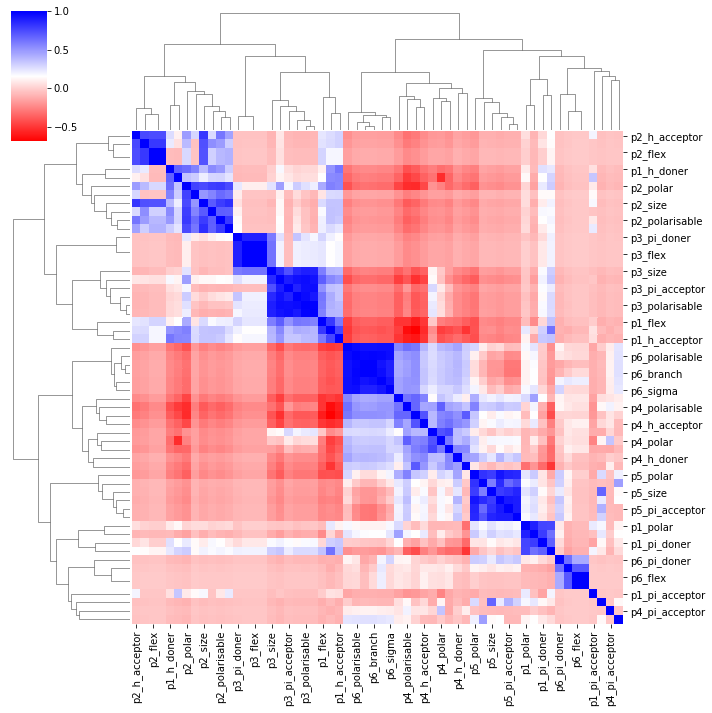

In [129]:
#TODO why is this not showiung the full matrix?
sns.clustermap(X_train.corr(),  cmap='bwr_r')

The correlations in this datset are much more complex as you can see. Still, we can use ``LinearRegression`` as a baseline:

In [130]:
res = pd.DataFrame(cross_validate(LinearRegression(), X_train, y_train, return_train_score=True))
res.mean()

fit_time       2.422237e-03
score_time     1.335001e-03
test_score    -1.222657e+20
train_score    4.868313e-01
dtype: float64

While the training score is 0.48, the test score is very, very negative, indicating numeric instabilities in the model. Given the strong correlations in the dataset, that's not surprising.
Ridge will fare much better here. As we expect to require a lot of regularization, we'll change the grid a bit to go until alpha=1000:

In [134]:
param_grid = {'alpha': np.logspace(-2, 3, 6)}
param_grid

{'alpha': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [135]:
grid = GridSearchCV(Ridge(), param_grid, return_train_score=True)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.07556489256250143
{'alpha': 10.0}


The best average score is 0.07, which is quite low, indicating that the model is only slightly better than predicting the mean. Again, we can look at the results for all parameters to get a better idea of the role of alpha:

(-0.1, 0.5)

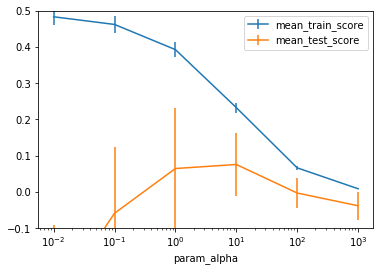

In [138]:
res = pd.DataFrame(grid.cv_results_)
ax = res.plot(x='param_alpha', y='mean_train_score', yerr='std_train_score', logx=True)
res.plot(x='param_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
# cut off scores much below 0
ax.set_ylim(-.1, .5)

You can see a clear optimum around alpha=10, and a very characteristic pattern that mirrors the plot in TODO overfitting underfitting very closely.
The more we increase alpha, the lower the training set score goes - which is expected, as a larger value of alpha puts less emphasis on the training set error. On the test set, we can see that for low values of alpha, the results are terrible, while for very high values of alpha, they go towards 0. Between these extremes, there is a clear sweetspot where the penalty reduces model complexity, but still allows fitting a model that can make reasonable predictions (though an R^2 of 0.07 potentially stretches the meaning of "reasonable" a bit).

Given the numeric instabilities, we won't bother visualizing the coefficients for linear regression, but we will show them for the ridge model for several values of alpha.

In [140]:
# extract the model with the best parameters from our grid-search (alpha=10)
ridge = grid.best_estimator_
ridge

Ridge(alpha=10.0)

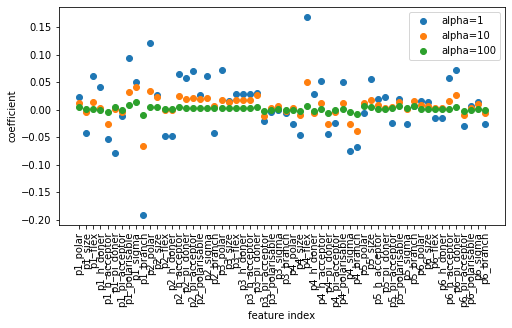

In [152]:
# instantiate and fit models for two neighboring values of alpha
ridge100 = Ridge(alpha=100).fit(X_train, y_train)
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
plt.figure(figsize=(8, 4))
# plot coefficients for all three models
plt.plot(ridge1.coef_, 'o', label="alpha=1")
plt.plot(ridge.coef_, 'o', label=f"alpha={ridge.alpha:.0f}")
plt.plot(ridge100.coef_, 'o', label="alpha=100")
plt.ylabel("coefficient")
plt.xlabel("feature index")
plt.xticks(np.arange(X_train.shape[1]), X_train.columns, rotation=90)
plt.legend()

You can see that as we discussed above, increasing alpha will shrink each coefficient more towards zero. Usually the sign of the coefficient stays the same, independent of alpha, however, that's not guaranteed to happen.

TODO learning curve maybe?

## Lasso Regression
Another very commonly used model for regression is Lasso (TODO short for). Similar to ridge, lasso also penalizes large values of the coefficients. However, instead of using the euclidean norm or L2 norm as in Ridge, lasso uses the sum of absolute values, also known as the L1 norm. This is only a small change in the objective, however, it has a big effect on the model and optimization. While in Ridge, all of the coefficients are pushed towards zero, they are unlikely to ever be exactly zero. Using lasso on the other hand, increasing the regularization parameter alpha will make more and more parameters exactly zero.
This is a form of automatic feature selection, and can be helpful to find more compact and interpretable models.

```{admonition} Mathematical details
The motivation for lasso is relatively straight-forward: find a linear model with as few nonzero coefficients as possible.
While this is a very natural requirement, solving this problem exactly is usually not feasible (it would be using what's known as the L-infinity norm as penalty, which yields an NP-Hard optimization problem TODO Rudin can solve it).
Lasso can be seen as a relaxed version of this problem that is much more easily solvable but still results in a reduced set of features.
Lasso can be written as:
$$ \min_{w \in \mathbb{R}^p, b\in\mathbb{R}} \sum_{i=1}^n (w^T\mathbf{x}_i + b - y_i)^2 + \alpha ||w||_1 $$
As Ridge, this is a (TODO strongly?) convex optimization problem for alpha>0. However, unlike lasso, it's not a least squares problem, and is not differentiable.
This makes the optimization slightly more tricky; however, it's a well-studied problem with plenty of algorithms available to solve it.
Read more in ESL TODO.
```

In [161]:
from sklearn.linear_model import Lasso

# TODO explain options
param_grid = {'alpha': np.logspace(-5, 0, 10)}
grid = GridSearchCV(Lasso(max_iter=10000, normalize=True), param_grid, cv=10)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

0.021748024821626865
{'alpha': 0.0004641588833612782}


For this dataset, Lasso doesn't fare as well as Ridge did. However, the model is much simpler, it only uses 15 out of the 62 features:

In [160]:
np.sum(grid.best_estimator_.coef_ != 0)

15

We can look at the training and validation scores, as well as how the alpha parameter influences the number of features TODO recreate plot:

![:scale 90%](images/lasso_alpha_triazine.png)

As you can see, increasing alpha decreases the amount of non-zero features and around alpha=0.05, all features become zero.
Often, Ridge performs better in terms of cross-validation score, but lasso will usually provide a more simple model. There is one caveat for the interpretability of lasso, though.
In a case such as the triazine dataset we're using here, with many highly correlated features, the selection of features made by Lasso is very unstable. Lasso will usually select one out of a group of correlated features, and which one is selected can easily change, for example when splitting the data differently:

=

## Elastic Net

- Combines benefits of Ridge and Lasso

- two parameters to tune.


$$\min_{w \in \mathbb{R}^p, b\in\mathbb{R}} \sum_{i=1}^n ||w^T\mathbf{x}_i + b - y_i||^2 + \alpha_1 ||w||_1 +  \alpha_2 ||w||^2_2 $$



You can also combine them. This actually what works best in
practice. This is what's called the Elastic Net. Elastic Net
tries to combine both of these penalizations together. You
now have both terms, you have the L1 norm and the L2 norm
and you have different values of alpha. Basically, this
generalizes both. If you choose both these are alpha, it can
become ridge and it can become Lasso, it can become any
anything in between. Generally, ridge helps generalization.
So it's a good idea to have the ridge penalty in there, but
also maybe if there are some features that are really not
useful, the L1 penalty helps makes the same exactly zero.

## Parametrization in scikit-learn
$$\min_{w \in \mathbb{R}^p, b\in\mathbb{R}} \sum_{i=1}^n (w^T\mathbf{x}_i + b - y_i)^2 + \alpha \eta ||w||_1 +  \alpha (1 - \eta) ||w||^2_2 $$

Where $\eta$ is the relative amount of l1 penalty (`l1_ratio` in the code).


The way this parameterize in scikit-learn is slightly
different. In scikit-learn, you have a parameter alpha,
which is the amount of regularization and then there's a
parameter called l1_ratio, that says how much of the penalty
should be L1 and L2. If you make this one, you have Lasso,
if you make it zero, you have a Ridge. Don't use Lasso or
Ridge and set alpha zero, because the solver will not handle
it well. If you actually want alpha equal to zero, use
linear regression. Now we have more parameters to tune, but
we just have a more general model. This actually works
pretty well often.

## Grid-searching ElasticNet

```python
from sklearn.linear_model import ElasticNet
param_grid = {'alpha': np.logspace(-4, -1, 10),
              'l1_ratio': [0.01, .1, .5, .8, .9, .95, .98, 1]}

grid = GridSearchCV(ElasticNet(), param_grid, cv=10)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)
```
```
{'alpha': 0.001, 'l1_ratio': 0.9}
0.100
```
```python
(grid.best_estimator_.coef_!= 0).sum()
```
```
10

```


Here is me doing a grid search. If you have two parameters
for the grid search it will do all possible combinations.
Here I do a logarithmic space for alpha and for the
l1_ratio, I use something that’s very close to zero and
something that's very close to one and some stuff in
between. If you want to analyze the output of a 2D grid
search a little bit harder we can’t do the nice curve
anymore.

## Analyzing grid-search results
```python
import pandas as pd
res = pd.pivot_table(pd.DataFrame(grid.cv_results_),
    values='mean_test_score', index='param_alpha', columns='param_l1_ratio')
```
.center[
![:scale 60%](images/elasticnet_search.png)
]


The way that I like to do it is, here's the grip.cv results.
And I put it in a data frame and then I'll make a pivot
table where the values are test score, the index is one
parameter and the columns are the other parameter. It allows
me to visualize the grid search nicely. This is alpha and
this is l1_ratio and you can see that if the l1_ratio is
pretty high, there are some pretty good results, if you set
the alpha accordingly. So here's like the diagonal of pretty
good things. This is the model that did best. There's a
slight caveat here that right now I did this with
cross-validation and so this is the cross-validation
accuracy. Last time I said, this is not really a good
measure of generalization performance. So here, I searched
way more parameters, I tried like 5 or 10 times as many
models. So it's likely that by chance, I'll get better
results. I didn't do this here in particular, because the
data set is small and very noisy but in practice, if you
want to compare models, you should evaluate it on a test set
and see which of the models actually are better on the test.
One more thing, why this is helpful is if the best value is
on the edge of this graph that means my ranges were too
small. Question is why we're using r square instead of the
squared loss, one of the answers is that's the default in
scikit-learn and the other answer is it's nice to know the
range so you know that perfect prediction is one and you
have some idea of what 0.5 means, the RMSE (the other norm
that you usually use is the RMSE) depends on the scale of
the output. So for example for the housing prices, it might
be interesting to see what is the standard error in terms of
dollars. If you want, like something that is in the units of
the output, RMSE is good or mean absolute error might even
be better. If you want something that is independent of the
units of the output r square is pretty good because you know
it's going to be between zero and one and it's measure
something like the correlation and so if it's like 0.9, you
know it’s a pretty good model. If my RMSE is 10,000 I don't
know if have a good model or a bad model depends on what the
range of the outputs is. The last thing I want to talk about
today is this was basically changing the regularization
parts. The two most times regularization we looked at is
Ridge which is L2 penalty, Lasso which is an L1 penalty and
combining two of them which is Elastic Net. So now I want to
talk about changing the first part, which was the squared
loss of the predictions, basically.